In [1]:
import pandas as pd #Data Manipulation and preprocessing
import numpy as np 
import seaborn as sb #DataViz
import matplotlib.pyplot as plt #DataViz

#Algos
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#Tools for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

#Majic fucntion to show visualisations in the notebook
% matplotlib inline

In [2]:
df1 = pd.read_csv('winequality-red.csv', delimiter = ';') # Bringing in the data

Text(0.5,1,'Correlation')

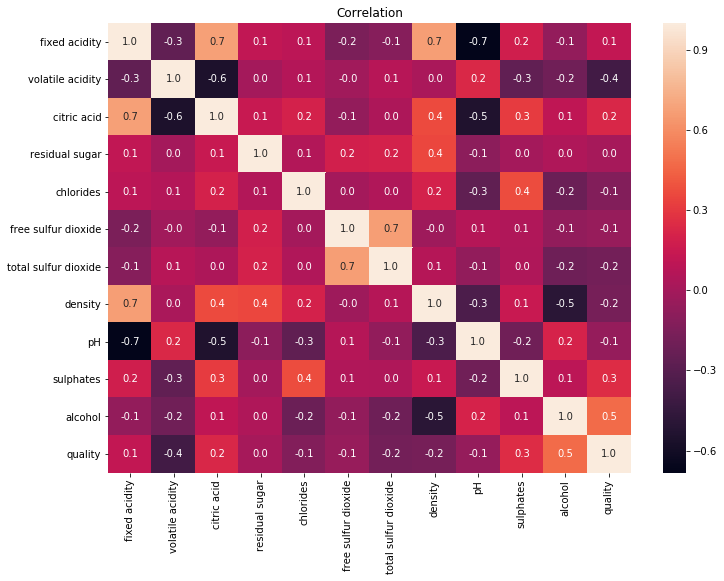

In [3]:
#Creating the heatmap to show correlation between features
dims = (11.7,8.27)
fig,ax = plt.subplots(figsize=dims)
CorMap = sb.heatmap(df1.corr(), annot = True,fmt= '.1f', ax=ax)
plt.title('Correlation')

# The aim here is to classify the quality of the wine

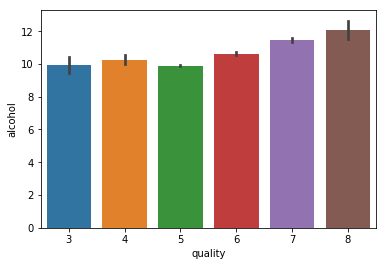

In [4]:
sb.barplot(x = 'quality', y='alcohol', data = df1)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


([<matplotlib.axis.XTick at 0x1c1094ae400>,
 <a list of 6 Text xticklabel objects>)

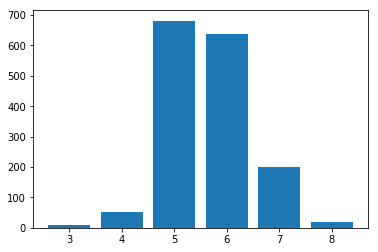

In [5]:
no_class = pd.value_counts(df1['quality']).sort_index()
print(no_class)
plt.bar(no_class.index, no_class, align = 'center')
plt.xticks(no_class.index)

In [6]:
# Turn the integer values into the strings so that they can be mapped to '0' - bad and '1' - good.
df1.quality = df1.quality.apply(str) 
df1.quality = df1.quality.map({'3':0, '4':0,'5':0,'6':1,'7':1,'8':1})
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    744
1    855
Name: quality, dtype: int64


([<matplotlib.axis.XTick at 0x1c1094dac88>,
 <a list of 2 Text xticklabel objects>)

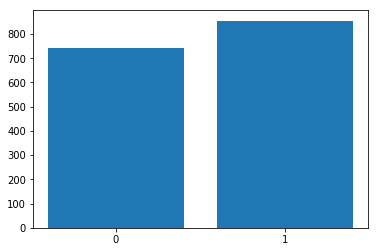

In [7]:
#New classes and their number of instances
no_class = pd.value_counts(df1['quality']).sort_index()
print(no_class)
plt.bar(no_class.index, no_class, align = 'center')
plt.xticks(no_class.index)

In [8]:
X = df1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1) #Train and test split

scaler = StandardScaler(with_mean = False)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

models = ['LogisticRegression', 'RandomForest','MLP']
scores = []

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Results for: Logistic Regression' + '\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
Accuracy = accuracy_score(y_test, pred)
print("Accuracy is "+ str(Accuracy)) 
scores.append(Accuracy)

Results for: Logistic Regression

[[111  43]
 [ 40 126]]
             precision    recall  f1-score   support

          0       0.74      0.72      0.73       154
          1       0.75      0.76      0.75       166

avg / total       0.74      0.74      0.74       320

Accuracy is 0.740625


**Logistic Regression** is a classification model that is often used in binary classification problems. 

![title](logistic.png)

In [10]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Results for: RandomForest' + '\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
Accuracy = accuracy_score(y_test, pred)
print("Accuracy is "+ str(Accuracy)) 
scores.append(Accuracy)

Results for: RandomForest

[[123  31]
 [ 45 121]]
             precision    recall  f1-score   support

          0       0.73      0.80      0.76       154
          1       0.80      0.73      0.76       166

avg / total       0.77      0.76      0.76       320

Accuracy is 0.7625


**Random Forests** are known as ensemble learning methods that use multiple classifiers to achieve a higher predictive accuracy that using single algorithms separately.
![title](randomforest.png)


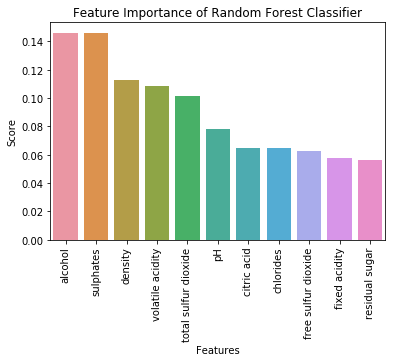

In [11]:
dn = {'features':X.columns, 'score':clf.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sb.barplot(y='score', x='features', data=df)
plot.set(ylabel='Score', xlabel='Features', 
         title='Feature Importance of Random Forest Classifier')
for item in plot.get_xticklabels():
    item.set_rotation(90)

In [12]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Results for: MLP' + '\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
Accuracy = accuracy_score(y_test, pred)
print("Accuracy is "+ str(Accuracy)) 
scores.append(Accuracy)

Results for: MLP

[[  5 149]
 [  1 165]]
             precision    recall  f1-score   support

          0       0.83      0.03      0.06       154
          1       0.53      0.99      0.69       166

avg / total       0.67      0.53      0.39       320

Accuracy is 0.53125


**MLP (Multiple Layer Perceptron)** is a form of a neural network that consists of more than 3 layers. You will have an Input Layer, an output layer and a number of hidden layers.

![title](nn2.png)

In [13]:
table = pd.DataFrame({'Accuracy':scores, 'Model':models})

table = table[['Model','Accuracy']].sort_values('Accuracy',ascending=False)
table.head()

,Model,Accuracy
1,RandomForest,0.762500
0,LogisticRegression,0.740625
2,MLP,0.531250
